![R-Kenntnis](../Pics/header.png "R-Kenntnis")

<div class="alert alert-block alert-info">

* **Titel:** R-Kenntnis Übungen 08: Zeitreihenanalyse mit R
* **Autor:** Prof. Dr. Denis Royer
* **Datum:** 28.11.2021 (Version 1.0)

</div>

# BI - R-Kenntnis Übungen 08: Zeitreihenanalyse mit R

## Hinweise - Bitte lesen!
Dieses Übungsblatt bezieht sich auf den R-Kurs ***R-Kenntnis*** zur Vorlesung Business Intelligence im Wintersemester 2021/2022.

Bitte lesen Sie die folgenden Kapitel und die enthaltenen Hinweise ***sorgfältig*** durch. Die Aufgaben sind zum Teil in den Kapiteln enthalten.

<div class="alert alert-block alert-warning">
<b>WICHTIG:</b> 
    
*Die Schritte im Source Code bauen zum Teil aufeinander auf. Sollten Sie Ihre RStudio oder JupyterLab Session schließen oder neu starten, so müssen Sie ggf. den Code erneut ausführen, bzw. die Packages neu laden.*
    
</div>

## Quellen und weitere Materialien

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Weitere Hinweise und Quellen finden Sie <a href="../index.ipynb">auf der zenteralen Übersicht zu den Übungen</a>. </div>

* **Hyndman und Athanasopoulos (2018)** - Hyndman, R.J. und Athanasopoulos, G.: Forecasting: Principles and Practice (2nd ed.) - https://otexts.com/fpp2/, Monash University, Australia, 2018.
* **Hyndman und Athanasopoulos (2021)** - Hyndman, R.J. und Athanasopoulos, G.: Forecasting: Principles and Practice (3rd ed.) - https://otexts.com/fpp3/, Monash University, Australia, 2021.

## Vorbereitende Schritte für die Übung 08


<div class="alert alert-block alert-warning">
<b>Wichtig:</b> Bevor wir loslegen, müssen wir zunächst einmal ein paar vorbereitende Dinge erledigen:

* Die notwendigen Packages laden (bspw. `tidyverse` und `forecast`)
* Datensatz laden (siehe *Data/cleaned_bikeshare_data.csv*)

</div>

In [9]:
# Laden der notwendigen Libraries
library(tidyverse)
library(ggplot2)
library(forecast)
library(lubridate)
library(ggfortify)

Registered S3 methods overwritten by 'ggfortify':
  method                 from    
  autoplot.Arima         forecast
  autoplot.acf           forecast
  autoplot.ar            forecast
  autoplot.bats          forecast
  autoplot.decomposed.ts forecast
  autoplot.ets           forecast
  autoplot.forecast      forecast
  autoplot.stl           forecast
  autoplot.ts            forecast
  fitted.ar              forecast
  fortify.ts             forecast
  residuals.ar           forecast



# Analyse von Zeitserien bei Bike Sharing LLC

 *Bike Sharing LLC* hat in den letzten zwei Jahre die Zahlen Ihrer Verleihstationen mitprotokolliert und hat für die Planung im Unternehmen folgende Fragestellungen:
 
* Wie entwickelt sich die Verleihrate der Fahrräder in den nächsten 6 Monaten?
 
Insbesondere geht es um Prognosen, die dafür dienen sollen, die Investoren von *Bike Sharing LLC* bezüglich der Entwicklung zu informieren aber auch um die Planung der Mitarbeiter für die kommende Saison. 

Für die Analyse soll eine Zeitreihenanalyse genutzt werden. Als Ansatz soll dabei das ARIMA Modell zum Einsatz kommen. Hierfür benötigen wir das Package `forecast` und folgende Funktionen.

```R
library(forecast)

ts()
arima()
auto.arima()
forecast()
decompose()
autoplot()
pull()
stl()
decompose()
ggtsdisplay()
checkresiduals()
acf()
pacf()
```


## Vorbereitung: Laden der Daten

Wie gehabt liegt der Datensatz in Moodle - alternativ können Sie auch den Datensatz aus den vorherigen Übungen nutzen.

In [ ]:
# Daten aus CSV Datei Laden
bike <- read_csv("../Data/cleaned_bikeshare_data.csv")
# Ausgabe der ersten Datensätze für eine Sichtprüfung
head(bike[,c(1,10,11,12,13)])

In [ ]:
str(bike)
# Uns interessieren insbesondere die Daten aus der Variablen
sum(bike$count) #(Gesamtzahl der entliehenen Fahrräder im Datensatz)

# Aufbereitung der Daten

Im ersten Schritt geht es darum, die Daten für die Zeitreihenanalyse vorzubereiten. Für die Analyse selbst hat man sich entschieden, die Daten pro Monat aufzubereiten und die Summen bezüglich der verliehenen Fahrräder zu bilden.

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

***Notwendige Schritte zum Nachvollziehen:***

* Fassen Sie die Rohdaten aus `bike$count` pro Monat zusammen.
   * Das ganze lässt sich mittels dplyr-Package und dem Pipe Syntax gut realisieren.
   * Gruppieren Sie die Daten nach Jahr/Monat. Hierbei hilft das Package `lubridate` mit den Funktionen `year()` und `month()` gut weiter, mit dem Sie die Angaben aus der Variablen `datetime` in seine Bestandteile zerlegen können.
    * Summieren Sie die Variable `bike$count`.
    * Speichern Sie Ihre Daten in einer Variable (bspw. `bike.monthly`).
* Erstellen Sie eine Zeitserie mit der Funktion `ts()` und dem bike.ts)
   * Start: 01/2017
   * Ende: 12/2018
   * Frequenz: 12 Monate

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Für das Nachvollziehen der Schritte ist es hilreich, <a href="../Uebung 4/R-Kenntnis Uebung 4.ipynb">Uebung 04</a> und die <a href="../Uebung 4/R-Kenntnis LSG Uebung 4.ipynb">zugehörigen Aufgaben</a> absolviert zu haben. </div>

In [ ]:
# Lubridate für die Aufbereitung der Zeitangaben laden
library(lubridate)

In [ ]:
# Daten monatsweise zusammenfassen
bike.monthly <- bike %>%
          group_by(year = year(datetime),
                   month = month(datetime)) %>%
          summarise(riders = sum(count))

In [ ]:
# Überprüfung, ob alle Jahr/Monat-Kombinationen auch einen Wert haben!
# Hierfür eignet sich die table() Funktion. Ist ein Wert vorhanden, so wird
# eine 1 in die entstehende Tabelle eingetragen - andernfalls eine 0.
table(bike.monthly$year, bike.monthly$month)

In [ ]:
# Timeseries mit ts() erstellen.
# WICHTIG: Die Daten müssen vorher in einen Vektor überführt werden.
# Hierfür kann man pull() aus dplyr verwenden
bike.riders <- pull(bike.monthly[, 3])
bike.ts <- ts(bike.riders, frequency = 12, start = c(2017, 1), end = c(2018, 12))
bike.ts

## Prüfung der Zeitserie: Stationarität der Zeitserie

Eine wichtige Vorbedingung der Analyse von Zeitserien ist es, dass dieses stationär sind. Eine Möglichkeit sich hierzu ein Bild zu verschaffen ist es, sich die Daten einmal mittels der `plot()` Funktion auszugeben.

In [ ]:
plot(bike.ts)

Eine weitere Möglichkeit ist es, die Daten mittels der `decompose()` Funktion zu zerlegen. Diese Funktion zerlegt die Zeitreihe in ihre Bestandteile Trend und Saison:

In [ ]:
# Zerlegen der Zeitreihe in Ihre Bestandteile
bike.stl <- decompose(bike.ts) 
# Die Funktion stl() würde auch gehen, benötigt aber min. 2 Perioden!
autoplot(bike.stl) # Plot der Daten

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

***Frage/Aufgabe***

* Nutzen sie die `decompose()` Funktion um die Daten aus bike.ts zu zerlegen.
* Geben Sie die Daten aus `decompose()` in einem Plot aus.
* Wie kann man die Daten interpretieren?

# Ableitung der Parameter für das ARIMA Modell

Um ARIMA als Modell nutzen zu können, müssen die Parameter für die Variablen p & q (P & Q) festgelegt werden. Dies kann entweder über die Funktion `auto.arima()` oder durch *eine manuelle Festlegung* geschehen. Beide Vorgehensweisen werden wir in den folgenden Abschnitten anschauen.

$$ARIMA = \underbrace{(p,d,q)}_{nicht-saisonal} \underbrace{(P,D,Q)_m}_{saisonal}$$

Wie in der ARIMA Formel dargestellt, müssen die Parameter - je nach Daten - für die saisonalen/nicht-saisonalen Aspekte festgelegt werden. Der Parameter $m$ gibt dabei die Anzahl Beobachtungen pro Jahr an:

* **AR** - einem autoregressiven Teil (Parameter p und P)
* **I** - einem Teil, der die Stationarität der Zeitreihe sicherstellt (Parameter d oder D)
* **MA** - einem Beitrag aus einem gleitenden Mittelwert (Parameter q oder Q)

Das "*fitting*" eines ARIMA Modells ist im folgenden Ablaufdiagramm kurz dargestellt:

![Ablaufdiagramm für die Modellierung von ARIMA Modellen (siehe <https://otexts.com/fpp2/arima-r.html> für weitere Details.)](../Pics/arimaflowchart.png)

## Generelle Gedanken zur Wahl der Parameter

* Ein erster Ansatz ist die Nutzung von `auto.arima` zur Festlegung der Parameter. ABER: Der Datensatz ist zu klein! Die Saisonalität wird mittels `stl()` nicht erkannt....
* Das Modell muss manuell angepasst werden, da man sonst kein gutes Modell findet!
* Es sind zu wenig Daten --> Es sind min. 50 Samples, bzw. zwei volle Perioden notwendig.
* **ERGO:** `auto.arima` liefert gute Daten, aber ein separates Fitting des Modells ist sinnvoll!

## Herstellen der Stationarität mittels Differencing

Je nach Beschaffenheit der Daten muss nun dafür gesorgt werden, dass die Daten stationär werden. Hierzu kann man, in wie in LV-11 vorgestellt, mit der `diff()` Funktion eine Trend- oder Saisonale- ifferenzierung durchgeführt werden.
Der sich ergebende Grad an Differencing wird auch als Parameter für den Parameter *d/D* des ARIMA Modells benötigt. Dieser ergibt sich aus der Anzahl der notwendigen Differencing Schritte, die notwendig sind bis die Daten stationär sind.

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

***Frage/Aufgabe:***

* Nutzen Sie die `diff()` Funktion, um die `bike.ts` Zeitserie weiter zu analysieren.
* Überprüfen Sie, inwieweit folgendes Differencing die Zeitreihe stationär macht:
    * Trendweises Differencing
    * Saisonales Differencing
    * Die Kombination der beiden
* Plotten Sie Ihre Ergebnisse - wie lassen sich diese interpretieren? Sie können hierfür die `plot()` Funktion nutzen. Zusätzlich hilft die Funktion `ggtsdisplay()` aus dem Package `forecast`, um weitere Einsichten in die Daten zu erhalten.
* Wie würden Sie die Parameter für den Parameter d/D wählen? Begründen Sie Ihre Beobachtungen.

<div class="alert alert-block alert-success">
<b>Lösungsansatz:</b></div>

In [ ]:
par(mfrow = c(2, 2))
# Trend Differencing --> d=1
bike.ts.diff_trend <-diff(bike.ts)
# Saison Differencing d=0/D=1
bike.ts.diff_saison <- diff(bike.ts, lag = 12)
# Trend und Saison Differencing kombiniert--> d=1 / D=1
bike.ts.diff_trendsaison <- diff(diff(bike.ts, lag = 12))

plot(bike.ts, ylim = c(-30000, max(bike.ts)))
plot(bike.ts.diff_trend, ylim = c(-30000, max(bike.ts)))
plot(bike.ts.diff_saison, ylim = c(-30000, max(bike.ts)))
plot(bike.ts.diff_trendsaison, ylim = c(-30000, max(bike.ts)))

# mit ggtsdisplay()
ggtsdisplay(bike.ts)
ggtsdisplay(bike.ts.diff_trend)
ggtsdisplay(bike.ts.diff_saison)
ggtsdisplay(bike.ts.diff_trendsaison)

Zusätzlicher Hinweis:
Um steigende Varianz einer Zeitreihe zu entfernen kann man auf eine BoxCox 
ransformation zugreifen. 
```R
data <- BoxCox(bike.ts, lambda = 0.5)
```
Für den hier vorliegenden Datensatz reicht ein einfaches Differencing aus (d=1).
Der Plot zeigt bei d=1 schon einen ausreichend stationären Verlauf der Zeitreihe!
Dementsprechend arbeiten wir mit den Daten aus dem Vector bike.ts.diff_trend weiter um
bspw. die ACF und PACF Plots zu erstellen.

## Nutzung von `auto.arima()`

Die Funktion `auto.arima()` berechnet die Parameter p, d und q anhand eines Algorithmus automatisch aus. Hierbei werden sog. Informationskriterien zur Auswahl des Modells genutzt. Ein *Informationskriterium* ist ein Kriterium zur Auswahl eines Modells in der Statistik. Man folgt dabei der Idee von Ockhams Rasiermesser, dass ein Modell nicht unnötig komplex sein soll und balanciert die Anpassungsgüte des geschätzten Modells an die vorliegenden empirischen Daten (Stichprobe) und dessen Komplexität, gemessen an der Anzahl der Parameter, aus. Die Anzahl der Parameter wird dabei „*strafend*“ berücksichtigt, da sonst komplexe Modelle mit vielen Parametern bevorzugt würden.

Bei `auto.arima()` kommen folgende Informationskriterien zum Einsatz (siehe auch <https://otexts.com/fpp2/arima-estimation.html>):

* Akaikes Informationskriterium (AIC und AICc) *und*
* Bayesian Information Criterion (BIC)

**Gute Modelle erhält man, indem man die Werte für AIC, AICc oder BIC minimiert.**

**Wichtig:** Es ist wichtig anzumerken, dass die Informationskriterien für die Parameter p und q gut geeignet sind. Parameter d muss separat festgelegt werden (Differencing).

In [ ]:
bike.fit.auto = auto.arima(bike.ts, 
                           trace = TRUE, 
                           seasonal = TRUE, 
                           approximation=FALSE, 
                           ic = "aicc", 
                           stepwise=FALSE)

Warning message:
“The chosen seasonal unit root test encountered an error when testing for the first difference.
From stl(): series is not periodic or has less than two periods
0 seasonal differences will be used. Consider using a different unit root test.”



 ARIMA(0,1,0)                               : 526.1537
 ARIMA(0,1,0)            with drift         : 527.6718
 ARIMA(0,1,1)                               : 523.8984
 ARIMA(0,1,1)            with drift         : 526.0475
 ARIMA(0,1,2)                               : 520.3227
 ARIMA(0,1,2)            with drift         : 523.048
 ARIMA(0,1,3)                               : 522.6103
 ARIMA(0,1,3)            with drift         : 525.7873
 ARIMA(0,1,4)                               : 525.2703
 ARIMA(0,1,4)            with drift         : 528.7565
 ARIMA(0,1,5)                               : 528.9845
 ARIMA(0,1,5)            with drift         : Inf
 ARIMA(1,1,0)                               : 521.5564
 ARIMA(1,1,0)            with drift         : 524.0384
 ARIMA(1,1,1)                               : 524.0621
 ARIMA(1,1,1)            with drift         : 526.8832
 ARIMA(1,1,2)                               : 523.0081
 ARIMA(1,1,2)            with drift         : 526.152
 ARIMA(1,1,3)   

In [ ]:
bike.fit.auto = auto.arima(bike.ts, 
                           trace = TRUE, 
                           seasonal = TRUE, 
                           approximation=FALSE, 
                           ic = "aicc", 
                           stepwise=FALSE)

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

***Frage/Aufgabe***

* Führen Sie `auto.arima()` für die Zeitreihe aus!
* Was bedeuten die Parameter beim Aufruf von `auto.arima()`? (Nutzen Sie die Hilfefunktion.)
* Wie lassen sich die Ausgaben der "trace" von `auto.arima()` interpretieren?
* Überprüfen Sie das resultierende Modell mittels der `checkresiduals()` Funktion. Was können Sie sehen (siehe auch folgender Abschnitt)?


In [ ]:
bike.fit.auto %>% 
  residuals() %>% 
  ggtsdisplay()

## Portmanteau-Tests (Ljung/Box Test auf Autokorrelation)
Portmanteau-Tests sind statistische Tests, mit deren Hilfe für mehrere Autokorrelationskoeffizienten getestet werden kann, ob sie sich signifikant von null unterscheiden. Dies ist vor allem bei der Prüfung der Autokorrelationsfreiheit der Residuen im Rahmen der Diagnosephase einer Zeitreihenanalyse wichtig.

Portmanteau-Tests sind reine Signifikanztests. Sie testen nicht gegen eine klar formulierte Gegenhypothese.

Die Teststatistik wird Q-Statistik genannt.

**Ljung/Box** (benannt nach den Statistikern Greta M. Ljung und George EP Box) ist ein solcher Test, der auch bei Zeitreihen mit weniger als 100 Zeitreihenwerten zufriedenstellend arbeitet. Dieser arbeitet nach folgendem Testvorgehen:

* $H_0$: Die Daten sind unabhängig voneinander verteilt (d.h. die Korrelationen in der Population, aus der die Stichprobe entnommen wurde, sind 0, so dass alle beobachteten Korrelationen in den Daten aus der Zufälligkeit des Stichprobenprozesses resultieren).
* $H_1$: Die Daten sind nicht unabhängig verteilt; sie weisen eine Autokorrelation auf (serielle Korrelation).

Dabei wird $H_0$ verworfen, wenn der P-Wert unter der 5%-Schwelle liegt. **Wir suchen also hohe p-Werte, da diese auf einen Hinweis auf Autokorrelationsfreiheit geben.**


	Ljung-Box test

data:  Residuals from ARIMA(0,1,2)
Q* = 2.3805, df = 3, p-value = 0.4973

Model df: 2.   Total lags used: 5



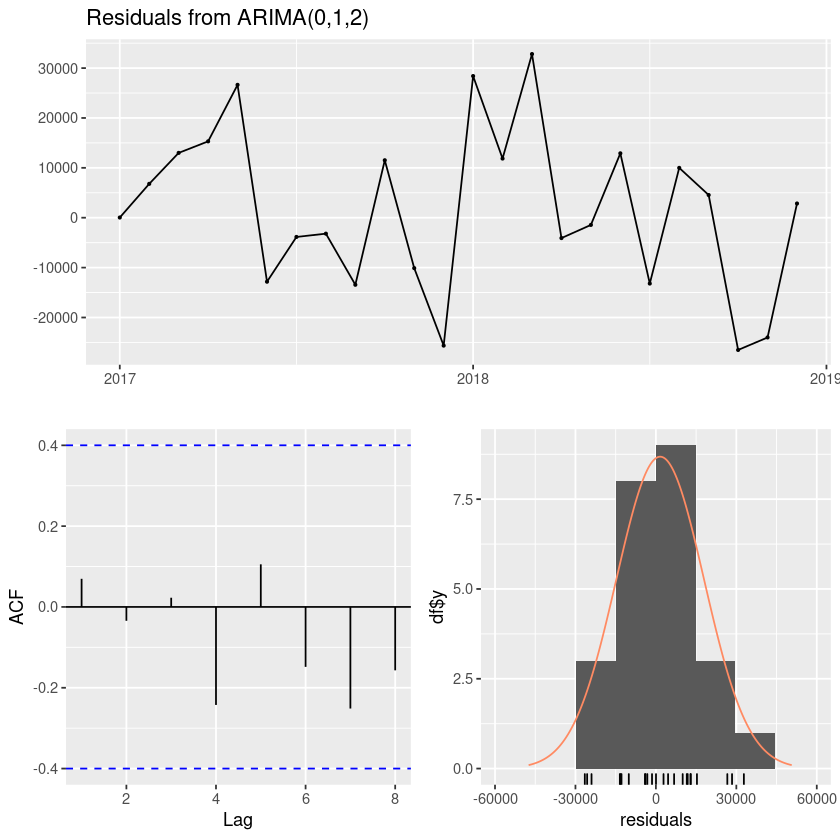

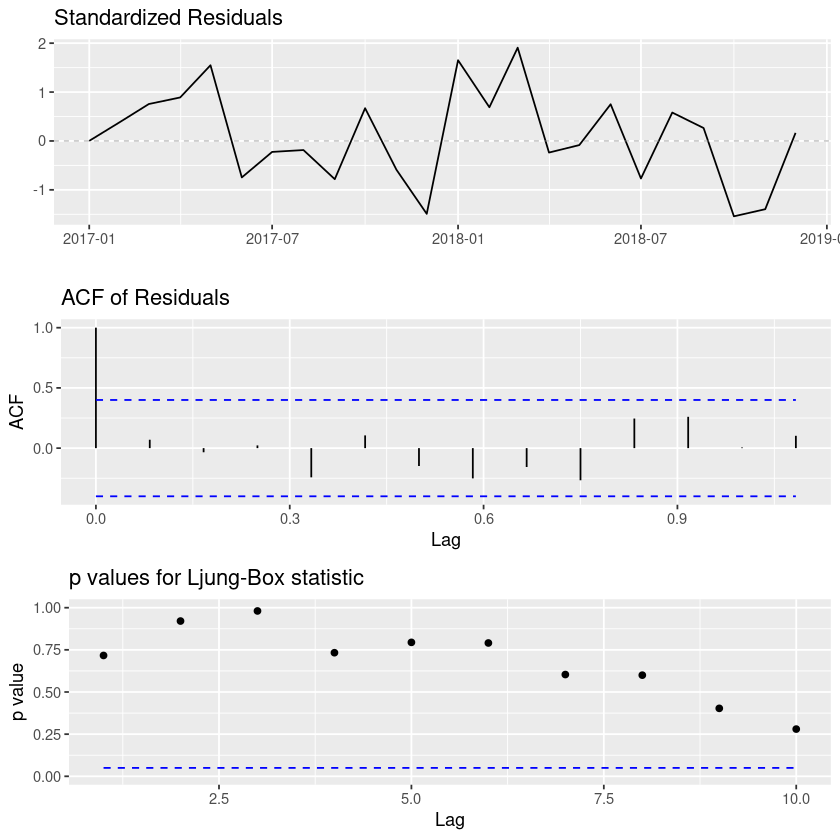

In [14]:
# Test inkl. Plots
checkresiduals(bike.fit.auto)
ggtsdiag(bike.fit.auto)

<div class="alert alert-block alert-info">
<b>Hinweis:</b> <a href="https://statologie.de/ljung-box-test/">Mehr zum Ljung/Box Test finden sie hier.</a></div>

## Vorhersagen treffen mit dem `auto.arima()` Modell

Nachdem nun das Modell mittels `auto.arima()` erstellt wurde, können wir es für Prognosen einsetzen:

In [ ]:
# Forecast erstellen für 6 Monate --> h = 6
bike.yr_forecast <- forecast(bike.fit.auto, h = 6)
# Ausgabe der Daten als Plot...
autoplot(bike.yr_forecast)
# ... und als Tabelle
bike.yr_forecast

## Manuelle Festlegung der Parameter

Für die manuelle Festlegung der Parameter kann man auf die (Partielle) Autokorellationsfunktion (ACF/PACF) zurückgreifen. Erstellt man diese zwei Diagramme aus der untersuchten Zeitreihe, so kann man folgendes ableiten:

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Mehr zu PACF und ACF siehe hier: <a href="https://www.youtube.com/watch?v=DeORzP0go5I">(Youtube) ACF und PACF</a> oder <a href="https://ichi.pro/de/autokorrelation-und-partielle-autokorrelation-in-zeitreihendaten-32975526028430">hier.</a>  </div>

* **Für ein ARIMA (p,d,0) Modell spricht folgendes Muster:**
    * Der ACF ist exponentiell abnehmend oder sinusförmig.
    * Es gibt einen signifikanten Anstieg an Lag p in der PACF, aber keinen jenseits des Lag p.
* **Für ein ARIMA (0,d,q) Modell spricht folgendes Muster:**
    * Der PACF ist exponentiell abnehmend oder sinusförmig.
    * Es gibt einen signifikanten Anstieg an Lag q in der ACF, aber keinen jenseits des Lag q.
    

Folgendes Beispiel soll den Zusammenhang zwischen ACF und PACF für die Auswahl der Parameter p und q verdeutlichen:

In [ ]:
# Ausgabe der Plots nebeneinander
par(mfrow = c(1, 2))
# Trend Differencing --> d=1
bike.ts.diff_trend <-diff(bike.ts)

#Plots für ACF und PACF
acfRes <- acf(bike.ts.diff_trend)
pacfRes <- pacf(bike.ts.diff_trend)
#par(mfrow = c(1, 1))

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Wir können eine signifikante Spitze in jedem Plot ignorieren, wenn sie gerade außerhalb der Grenzen liegt und nicht in den ersten paar Lags. Immerhin ist die Wahrscheinlichkeit, dass ein Spike zufällig signifikant ist, liegt ungefähr bei eins zu zwanzig.</div>

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")

***Frage/Aufgabe***

* Wie lautet das angepasste ARIMA Modell, wenn man manuelle vorgeht?
* Wie verändern sich die Parameter bezüglich der saisonalen Daten (Differencing)?

<div class="alert alert-block alert-success">
<b>Lösungsansatz:</b></div>

In [ ]:
bike.ts %>% 
  diff() %>% 
  diff(lag=12) %>% 
  ggtsdisplay()

In [ ]:
# Zusätlich kann man einen Box.test() durchführen, um die Stationarität der Zeitreihe
# zu analysieren. Hohe p-Werte stehen für stationäre Daten!
Box.test(bike.ts, type="Ljung-Box")
Box.test(bike.ts.diff_trend, type="Ljung-Box")
Box.test(bike.ts.diff_saison, type="Ljung-Box")
Box.test(bike.ts.diff_trendsaison, type="Ljung-Box")

In [ ]:
bike.fit <- arima(bike.ts, order = c(1,0,0), seasonal = list(order = c(0,1,0)))
summary(bike.fit)

In [ ]:
bike.fit %>% 
  residuals() %>% 
  ggtsdisplay()

In [ ]:
checkresiduals(bike.fit)

## Vorhersagen treffen mit dem manuellen Modell 
Analog zum `auto.arima()` Modell lässt sich nun eine Vorhersage für die nächsten 6 Monate durchführen:

In [ ]:
bike.yr_forecast2 <- forecast(bike.fit, h = 6)
bike.yr_forecast2
autoplot(bike.yr_forecast2)

# Andere Modelltypen (tbats Modell)

Für die Vorhersage können auch andere Modelle genutzt werden. Hierzu gehört bspw. das TBATS Modell: [en.] Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend and Seasonal components.

Der Name des TBATS Modells bezieht sich auf die folgenden Eigenschaften:

* **T**: Trigonometric seasonality
* **B**: Box-Cox transformation
* **A**: ARIMA errors
* **T**: Trend
* **S**: Seasonal components

TBATS Modelle eignen sich besonders für Zeitreihen mit komplexer Saisonalität.

Mehr unter https://blog.tenthplanet.in/time-series-forecasting-tbats/

In [ ]:
tbats.fit <- tbats(bike.ts)
tbats.fit.forecast <- forecast(tbats.fit, h = 6)
autoplot(tbats.fit.forecast)
checkresiduals(tbats.fit)

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")
***Frage/Aufgabe***

* Vergleich Sie beide Modelle - wie beurteilen Sie den "*fit*" der Modelle (under-/overfitting)?

<div class="alert alert-block alert-success">
<b>Lösungsansatz:</b></div>

In [ ]:
monthly_data <- tbats(bike.ts)
year_forecast <- forecast(monthly_data, h = 12)
plot(year_forecast)

summary(year_forecast$mean)
summary(year_forecast$upper)
summary(year_forecast$lower)

mean_2011 <- round(as.numeric(
     filter(bike.monthly, year == 2011) %>%
          summarise(mean = mean(riders))), 0)
mean_2012 <- round(as.numeric(
     filter(bike.monthly, year == 2012) %>%
          summarise(mean = mean(riders))), 0)
mean_2013 <- round(mean(year_forecast$mean), 0)
max_mean_2013 <- round(max(year_forecast$mean), 0)

abline(h = max(year_forecast$mean), lty = 2, col = "blue")
segments(2011, mean_2011, x1 = 2012, y1 = mean_2011,
         col = "darkgray", lty = 2, lwd = 2)
segments(2012, mean_2012, x1 = 2013, y1 = mean_2012,
         col = "darkgray", lty = 2, lwd = 2)
segments(2013, mean_2013, x1 = 2014, y1 = mean_2013,
         col = "blue", lty = 2, lwd = 2)

text(2011.15, mean_2011 + 10000, mean_2011)
text(2012, mean_2012 + 10000, mean_2012)
text(2013, mean_2013 + 10000, mean_2013)
text(2013.85, max_mean_2013 + 10000, max_mean_2013)

# Übungsaufgaben: Analyse von Passagierdaten

## Datensatz und Aufgabe
Der Datensatz `AirPassengers` enthält die Daten für eine Fluggesellschaft und deren monatliches Passagieraufkommen für den Zeitraum von 1949 - 1960.

In [ ]:
data("AirPassengers")
# Ausgabe der Daten in einer druckfähigen Tabelle 
# mittels pander()
AirPassengers

![Übungsaufgabe](../Pics/excercise.png "Übungsaufgabe")
***Folgende Aufgaben:***


* Analysieren Sie die Daten und erstellen Sie eine Zeitreihenanalyse.
* Leiten Sie ein adäquates ARIMA Modell ab.
* Erstellen Sie mit Ihrem Modell eine Prognose für die Jahre 1961 - 1965.


# Lösungen

Die Lösungen zu den Übungen finden Sie in der *Datei <a href="R-Kenntnis LSG Uebung 8.ipynb">R-Kenntnis LSG Uebung 8.ipynb</a>*. Die Datei wird jeweils nach der Durchsprache der Übung bereitgestellt.

<div class="alert alert-block alert-info">
<b>Info:</b> Die Datei wird jeweils nach der Durchsprache der Übung bereitgestellt.</div>
